In [2]:
setwd("/projects/CARDIPS/analysis/epigenome_resource")
source("analyses/jennifer/notebooks/functions.R")

set.seed(5366)

# Supplemental 1: Subject Information

## 1c Variance explained per genotype PC

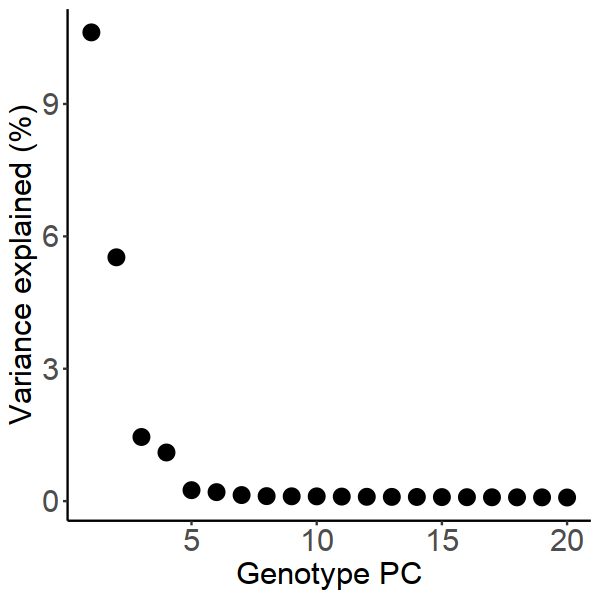

In [23]:
data = fread("eqtls/prepare_wgs/pca/pca.eigenval", data.table = F) # output from plink pca
data$pc = c(1:nrow(data))
data$V1 = data$V1 / nrow(data) 

psize(w = 5, h = 5)
p2 = ggplot(data, aes(x = pc, y = V1)) + geom_point(size = 4) + jn_classic + xlab("Genotype PC") + ylab("Variance explained (%)")
p2

fwrite(data %>% dplyr::rename(Genotype_PC = pc, Var_Explained = V1), "manuscript/figures/SourceData.Supp_Figure1c.GenoPC_Variance.txt", row.names = F, sep = "\t")

## 1b Number ancestry

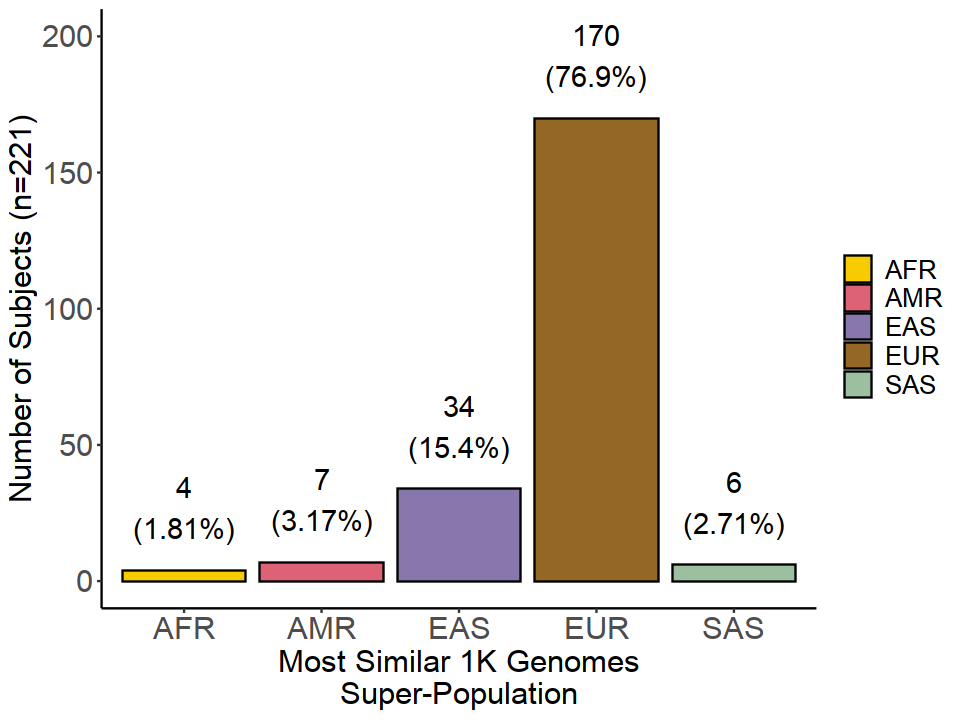

In [24]:
# read supplemental table
data = fread("/frazer01/home/tarthur/projects/Resource/SupplementalTables/TableS1_SubjectMetadata.txt", data.table = F) 
colnames(data) = gsub(" ", "_", colnames(data))

toplot = data[,c("Subject_UUID", "Most_Similar_1kgp_Super_Population")] %>% distinct()

# number of samples per super-population
toplot = data.frame(table(toplot$Most_Similar_1kgp_Super_Population))

# percentage of individuals in each super-population
toplot$total = sum(toplot$Freq)
toplot$pct = toplot$Freq / toplot$total * 100
toplot$label = paste(toplot$Freq, paste0("(", signif(toplot$pct, 3), "%)"), sep = "\n")

psize(w = 8, h = 6)
p3 = ggplot(toplot, aes(x = Var1, y = Freq, label = label, fill = Var1)) + 
    geom_bar(stat = "identity", color = "black") + 
    jn_classic + xlab("Most Similar 1K Genomes\nSuper-Population") + ylab("") + geom_text(vjust = -0.5, size = 6) + 
    ylab("Number of Subjects (n=221)") + ylim(0, 200) + 
    scale_fill_manual(values = c("#f6cb00", "#dd6276", "#8777ad", "#956725", "#9bbf9f"), name = "")
p3

# 1a Genotype PCA

In [36]:
# read PCs
eigenvec = fread("eqtls/prepare_wgs/pca/pca.eigenvec", data.table = F)
head(eigenvec,2)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,HG00096,-0.0119633,0.0254809,0.0101832,-0.0158429,0.00828788,-0.001710290,0.000416958,-0.0521700,⋯,0.0265818,0.02817930,-0.00117886,0.000392703,0.00467148,-0.00394923,-0.0184519,-0.00329039,0.00233276,0.0159294
2,0,HG00097,-0.0118389,0.0257770,0.0107973,-0.0155523,0.00915333,-0.000410632,0.003364570,-0.0398363,⋯,0.0348295,0.00475002,0.03646770,0.036961600,-0.00529203,-0.01503060,-0.0141881,0.01384880,-0.00959200,-0.0107010


In [37]:
# read superpopulation info for each individual
within = fread("eqtls/prepare_wgs/pca/within.txt", data.table = F)
head(within,2)

,V1,V2,V3
,<chr>,<chr>,<chr>
1,0,HG00271,EUR
2,0,HG00276,EUR


In [38]:
# merge info
eigenvec = merge(eigenvec, within[,c("V2", "V3")] %>% dplyr::rename(population = V3), by = "V2", all.x = T)
rownames(eigenvec) = eigenvec$V2
eigenvec[,c("V1", "V2")] = NULL
head(eigenvec,2)

,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,⋯,V14,V15,V16,V17,V18,V19,V20,V21,V22,population
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
001a6b85-bf54-4e81-b4f7-cff27a06e863,-0.0111476,0.0248209,0.0119997,-0.0114467,-0.0043898,0.000449165,0.000329167,-0.0100539,0.00309334,0.00676894,⋯,0.00505712,-0.00176903,-0.00413432,0.005513340,-0.00257523,0.00344648,0.00753300,-0.01467280,-0.009291020,ipscore
001b47b2-67fc-471f-8501-928295e70e3f,-0.0119627,0.0259778,0.0109258,-0.0143315,0.0137606,-0.002045330,0.005059540,-0.0143747,0.00831682,0.00875702,⋯,-0.00509797,0.00561355,0.01501060,-0.000283231,-0.00229558,0.00399100,0.00531344,-0.00643813,0.000372913,ipscore


In [39]:
table(eigenvec$population)


    AFR     AMR     EAS     EUR ipscore     SAS 
    671     348     515     521     273     492 

In [41]:
data %>% filter(WGS_UUID == "001a6b85-bf54-4e81-b4f7-cff27a06e863")

iPSCORE_ID,Family_ID,Sex,Age_at_Enrollment,Most_Similar_1kgp_Super_Population,Subject_UUID,WGS_UUID,GPC1,GPC2,GPC3,GPC4,GPC5
<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
iPSCORE_1_3,1,Female,57,EUR,2f63f491-a9f2-4177-b2a1-c3d21ed9c247,001a6b85-bf54-4e81-b4f7-cff27a06e863,-0.0111476,0.0248209,0.0119997,-0.0114467,-0.0043898


In [45]:
# filter for 221 ipscore
a = eigenvec %>% filter(population == "ipscore")
a = a[unique(data$WGS_UUID),] 
nrow(a)

# concatenate with 1kg individuals
b = eigenvec %>% filter(population != "ipscore")

eigenvec = rbind(a, b)

[1] 221

In [46]:
table(eigenvec$population)


    AFR     AMR     EAS     EUR ipscore     SAS 
    671     348     515     521     221     492 

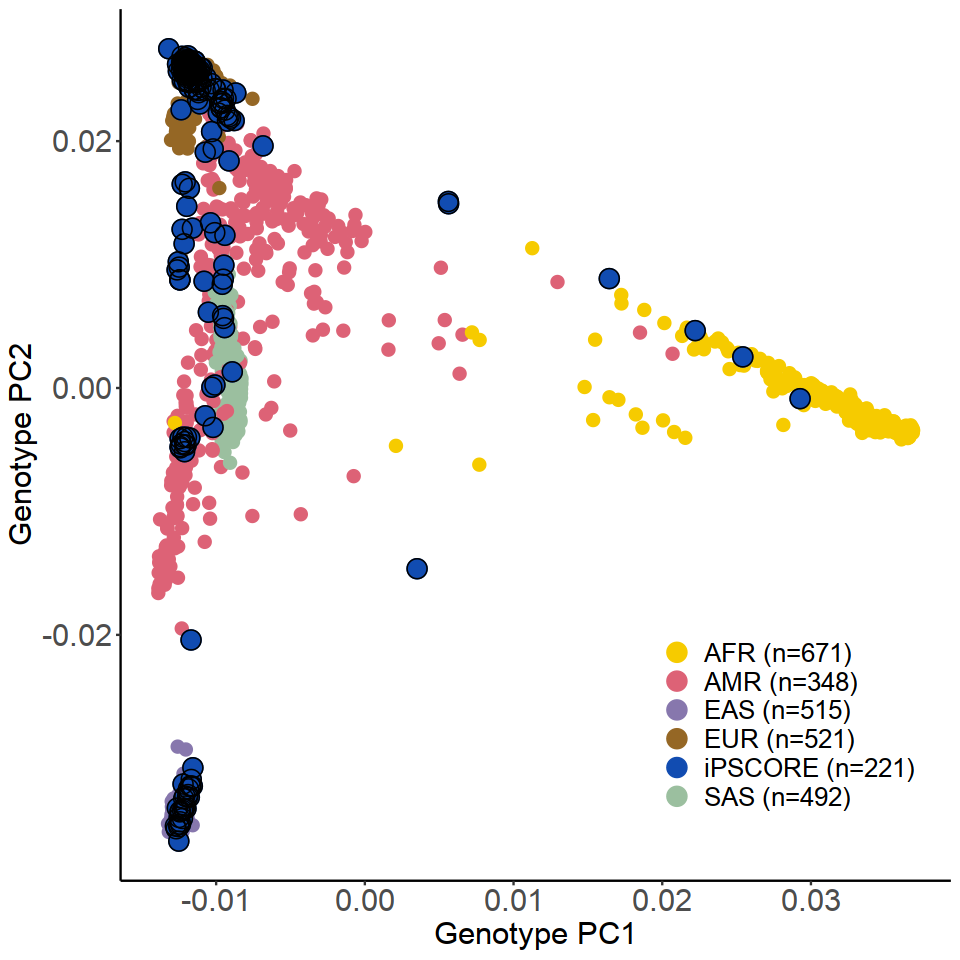

In [47]:
psize(w = 8, h = 8)
cols = c("#f6cb00", "#dd6276", "#8777ad", "#956725", "#114cb1", "#9bbf9f") 
p1 = ggplot(eigenvec, aes(x = V3, y = V4, color = population)) + 
    geom_point(size = 3) + jn_classic + xlab("Genotype PC1") + ylab("Genotype PC2") + 
    geom_point(data = eigenvec %>% filter(population == "ipscore"),  size = 5) + 
    geom_point(data = eigenvec %>% filter(population == "ipscore"),  size = 5, shape = 1, color = "black") + 
    scale_color_manual(values = cols, labels = c("AFR (n=671)", "AMR (n=348)", "EAS (n=515)", "EUR (n=521)", "iPSCORE (n=221)", "SAS (n=492)"), name = "") + 
    theme(legend.position = c(0.8, 0.2))

p1

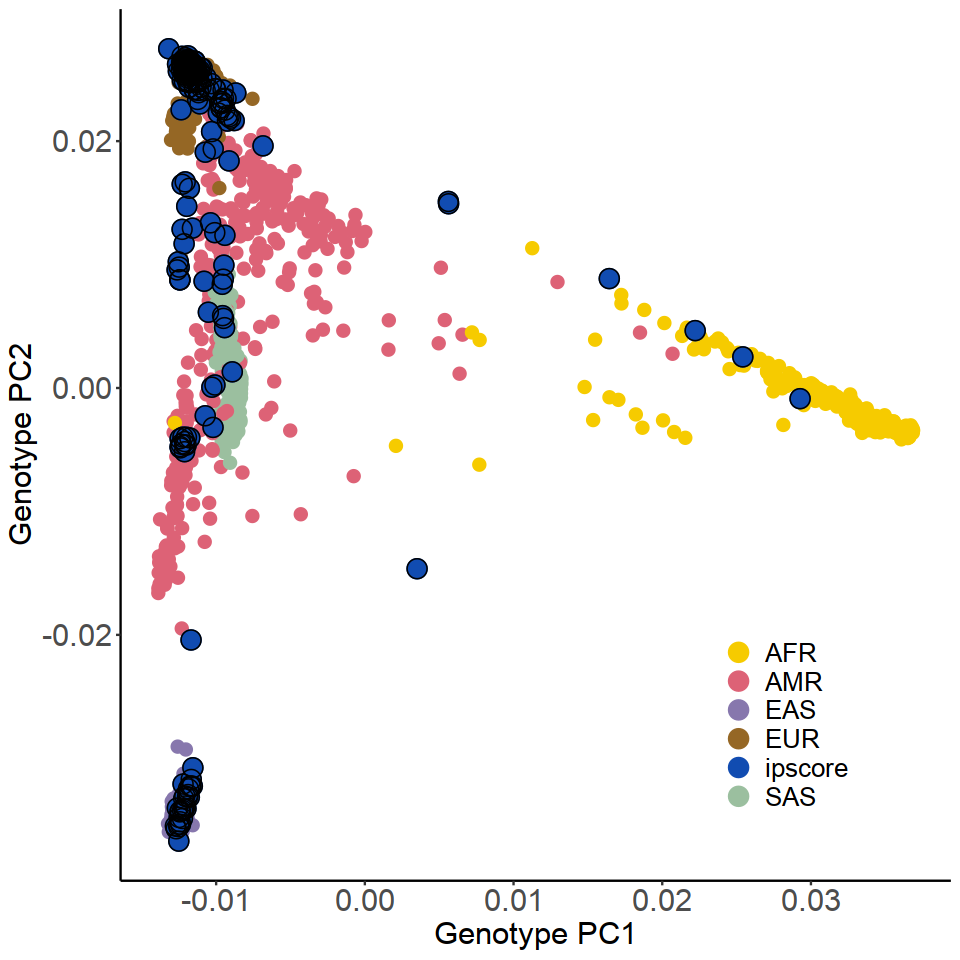

In [50]:
# check legend labels

psize(w = 8, h = 8)
cols = c("#f6cb00", "#dd6276", "#8777ad", "#956725", "#114cb1", "#9bbf9f") 
ggplot(eigenvec, aes(x = V3, y = V4, color = population)) + 
    geom_point(size = 3) + jn_classic + xlab("Genotype PC1") + ylab("Genotype PC2") + 
    geom_point(data = eigenvec %>% filter(population == "ipscore"),  size = 5) + 
    geom_point(data = eigenvec %>% filter(population == "ipscore"),  size = 5, shape = 1, color = "black") + 
    scale_color_manual(values = cols, name = "") + 
    theme(legend.position = c(0.8, 0.2))


## check consistency with supplemental table

In [55]:
eigenvec %>% select(V3, V4, V5, V6, V7) %>% head(2)

,V3,V4,V5,V6,V7
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
e95da9ab-054c-4ee9-aa0a-27f63f19c214,-0.0118453,0.0257950,0.00902976,-0.0147182,0.00658572
65800a26-3000-4254-8e7b-a95ea64012d0,-0.0119112,0.0255725,0.00999550,-0.0131605,0.01025480


In [57]:
data %>% filter(WGS_UUID == "e95da9ab-054c-4ee9-aa0a-27f63f19c214")

iPSCORE_ID,Family_ID,Sex,Age_at_Enrollment,Most_Similar_1kgp_Super_Population,Subject_UUID,WGS_UUID,GPC1,GPC2,GPC3,GPC4,GPC5
<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
iPSCORE_54_1,54,Male,53,EUR,000a5dcf-764a-4f69-ab1c-5950cec4bbbe,e95da9ab-054c-4ee9-aa0a-27f63f19c214,-0.0118453,0.025795,0.00902976,-0.0147182,0.00658572


In [58]:
data %>% filter(WGS_UUID == "65800a26-3000-4254-8e7b-a95ea64012d0")

iPSCORE_ID,Family_ID,Sex,Age_at_Enrollment,Most_Similar_1kgp_Super_Population,Subject_UUID,WGS_UUID,GPC1,GPC2,GPC3,GPC4,GPC5
<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
iPSCORE_51_1,51,Male,77,EUR,03235361-4310-4737-ac0b-4ce92d99fbf3,65800a26-3000-4254-8e7b-a95ea64012d0,-0.0119112,0.0255725,0.0099955,-0.0131605,0.0102548


## write source data

In [67]:
towrite = eigenvec %>% select(V3, V4, V5, V6, V7, population)
colnames(towrite) = c(paste0("GPC", c(1:5)), "Superpopulation")
towrite[towrite$Superpopulation == "ipscore",]$Superpopulation = "iPSCORE"

fwrite(towrite, "manuscript/figures/SourceData.Supp_Figure1a.GenoPCA.txt", row.names = T, sep = "\t")

# plot grid

Warning message:
“Graphs cannot be vertically aligned unless the axis parameter is set. Placing graphs unaligned.”


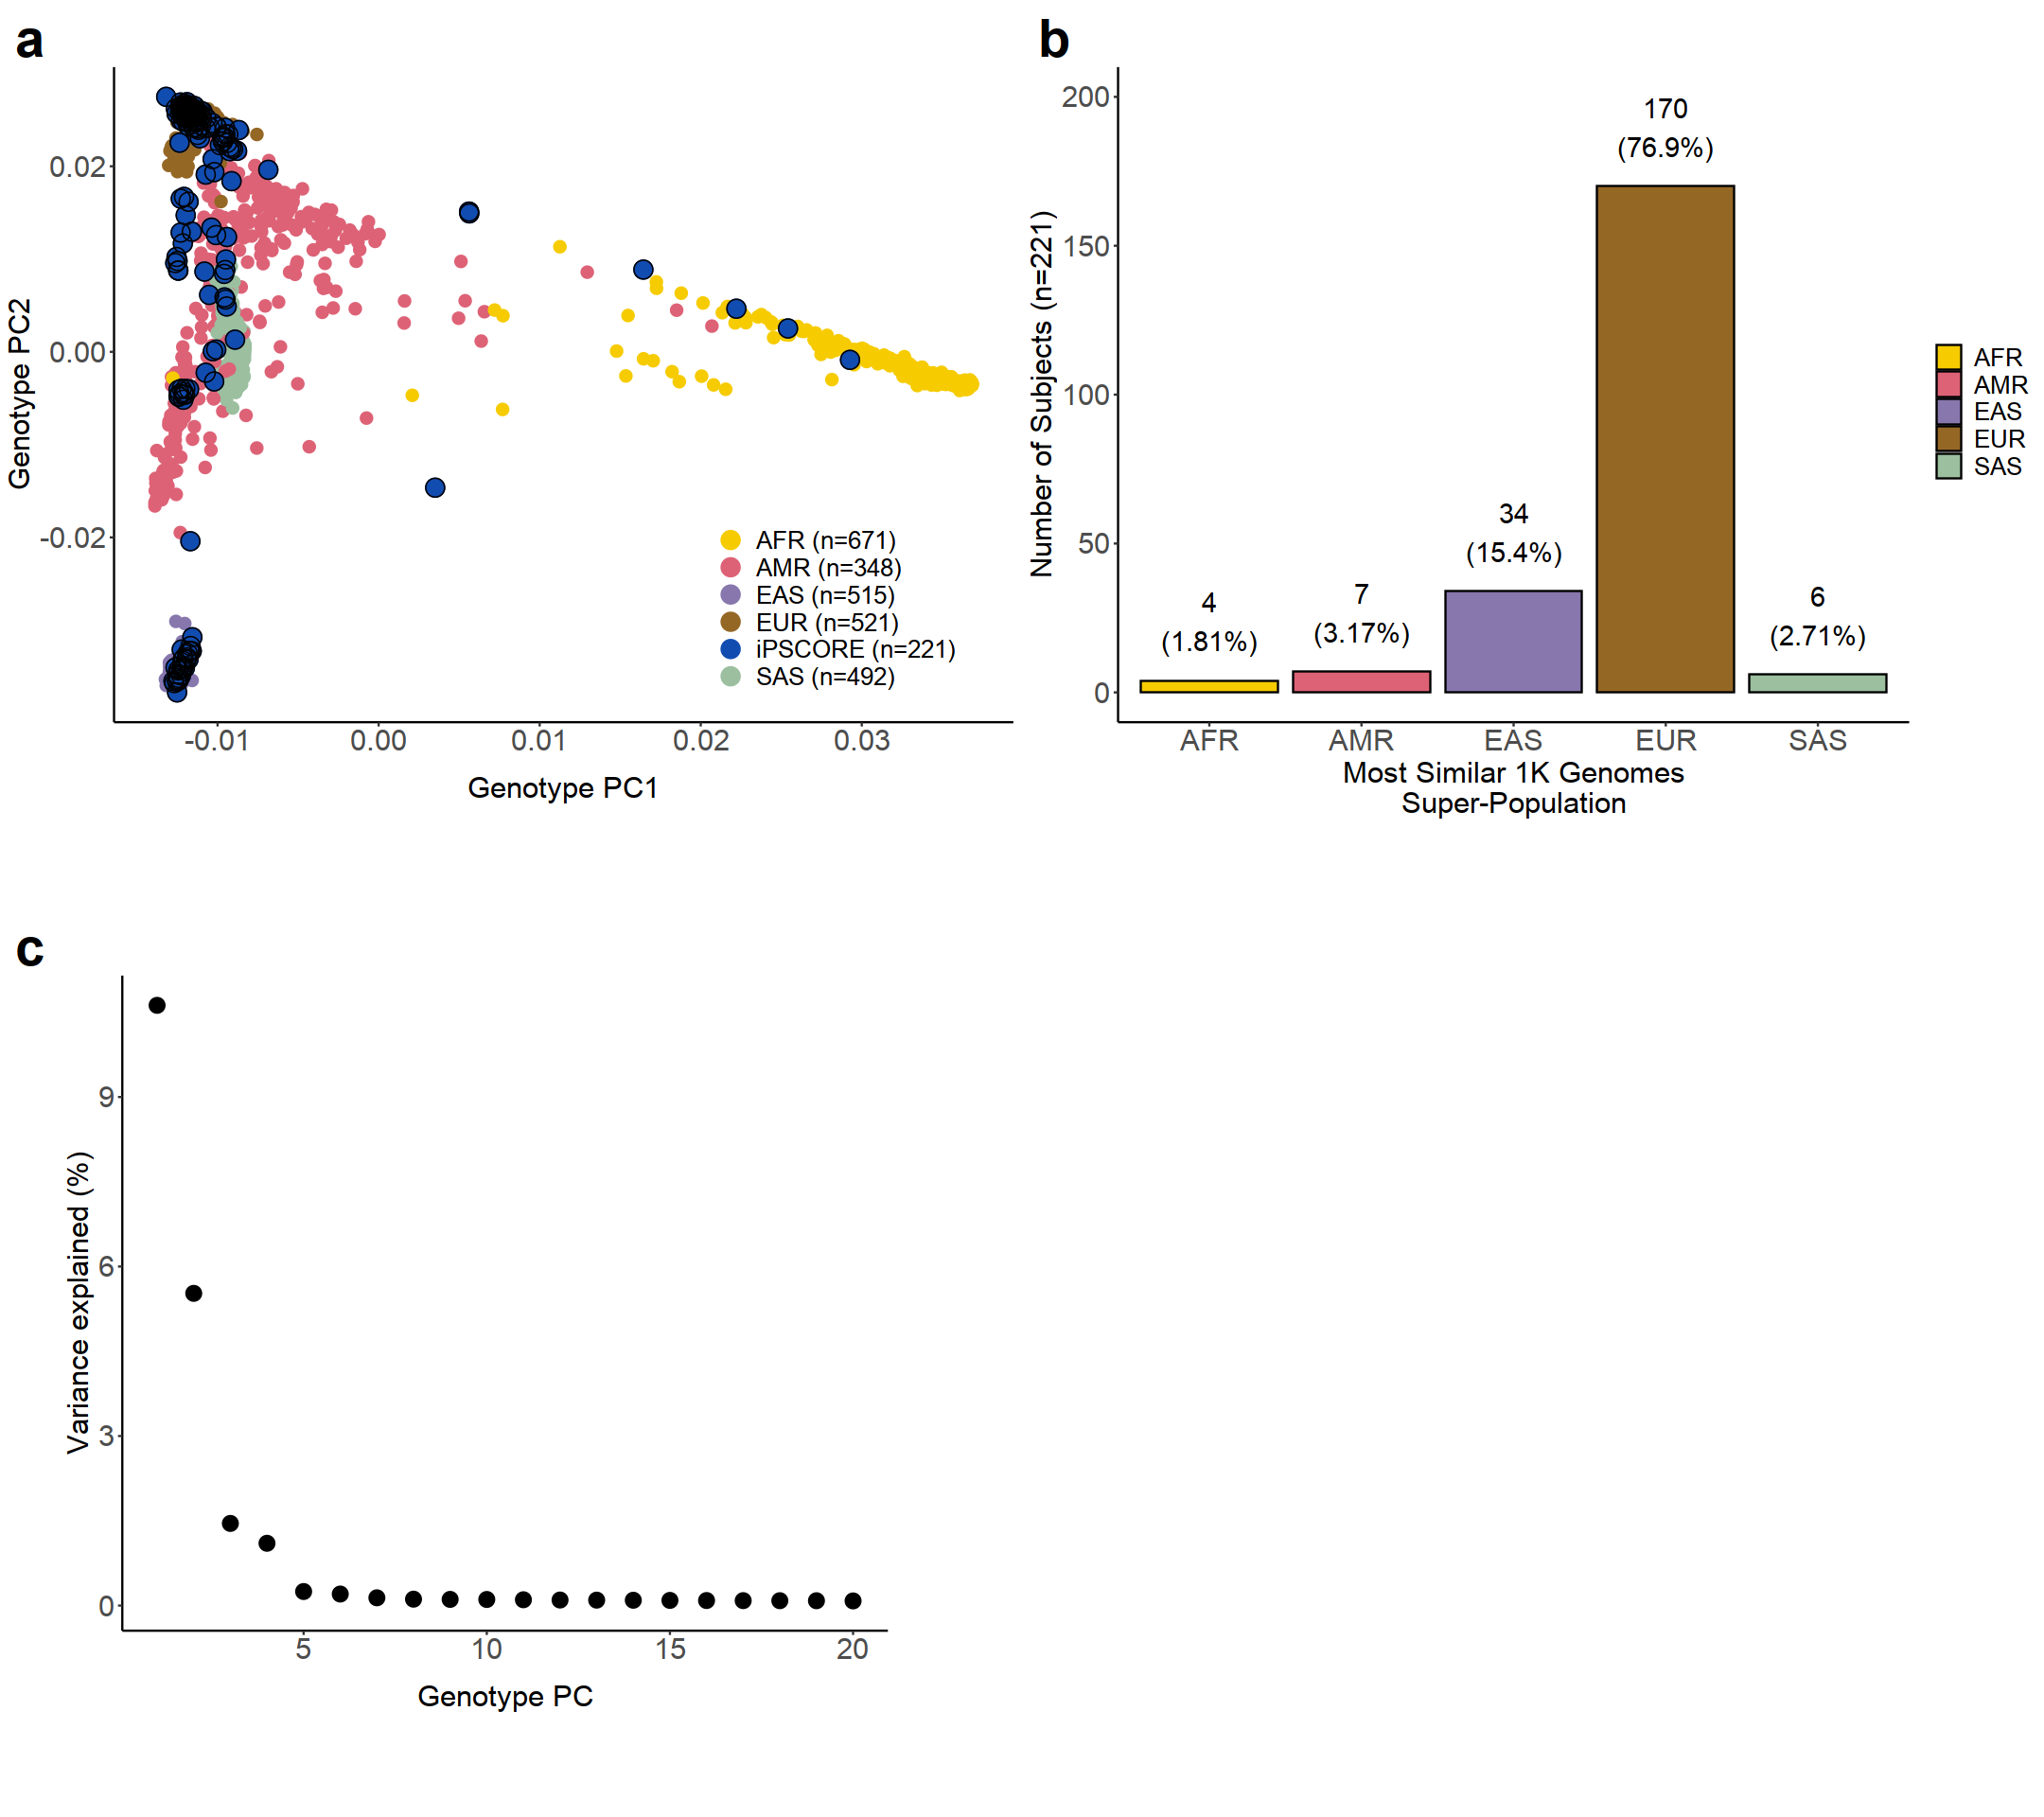

In [51]:
psize(w = 18, h = 16)
plot_grid(p1, p3, p2 + theme(plot.margin = margin(1.5, 3, 2, 1.5, "cm")), NULL, nrow = 2, labels = c("a", "b", "c"), label_size = 33, align = "hv")